<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [2]:
df = pd.read_csv('car_dataset.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [9]:
df.head().T

,0,1,2,3,4
Car_Name,ritz,sx4,ciaz,wagon r,swift
Year,2014,2013,2017,2011,2014
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0


In [10]:
df['Age'] = 2022 - df.Year

In [11]:
df.drop('Year', axis =1, inplace = True)

In [12]:
df.drop('Car_Name', axis = 1, inplace = True)

In [13]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [14]:
df = pd.get_dummies(df, drop_first = True)    #df = pd.get_dummies(df, drop_first = True)

In [15]:
df.head().T

,0,1,2,3,4
Selling_Price,3.35,4.75,7.25,2.85,4.60
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00
Owner,0.00,0.00,0.00,0.00,0.00
Age,8.00,9.00,5.00,11.00,8.00
Fuel_Type_Diesel,0.00,1.00,0.00,0.00,1.00
Fuel_Type_Petrol,1.00,0.00,1.00,1.00,0.00
Seller_Type_Individual,0.00,0.00,0.00,0.00,0.00
Transmission_Manual,1.00,1.00,1.00,1.00,1.00


In [16]:
df.shape

(301, 9)

In [17]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

### Features and target variable

In [18]:
X = df.drop(columns = 'Selling_Price', axis = 1)    # For training
y = df['Selling_Price']                             # For testing

In [19]:
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [20]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

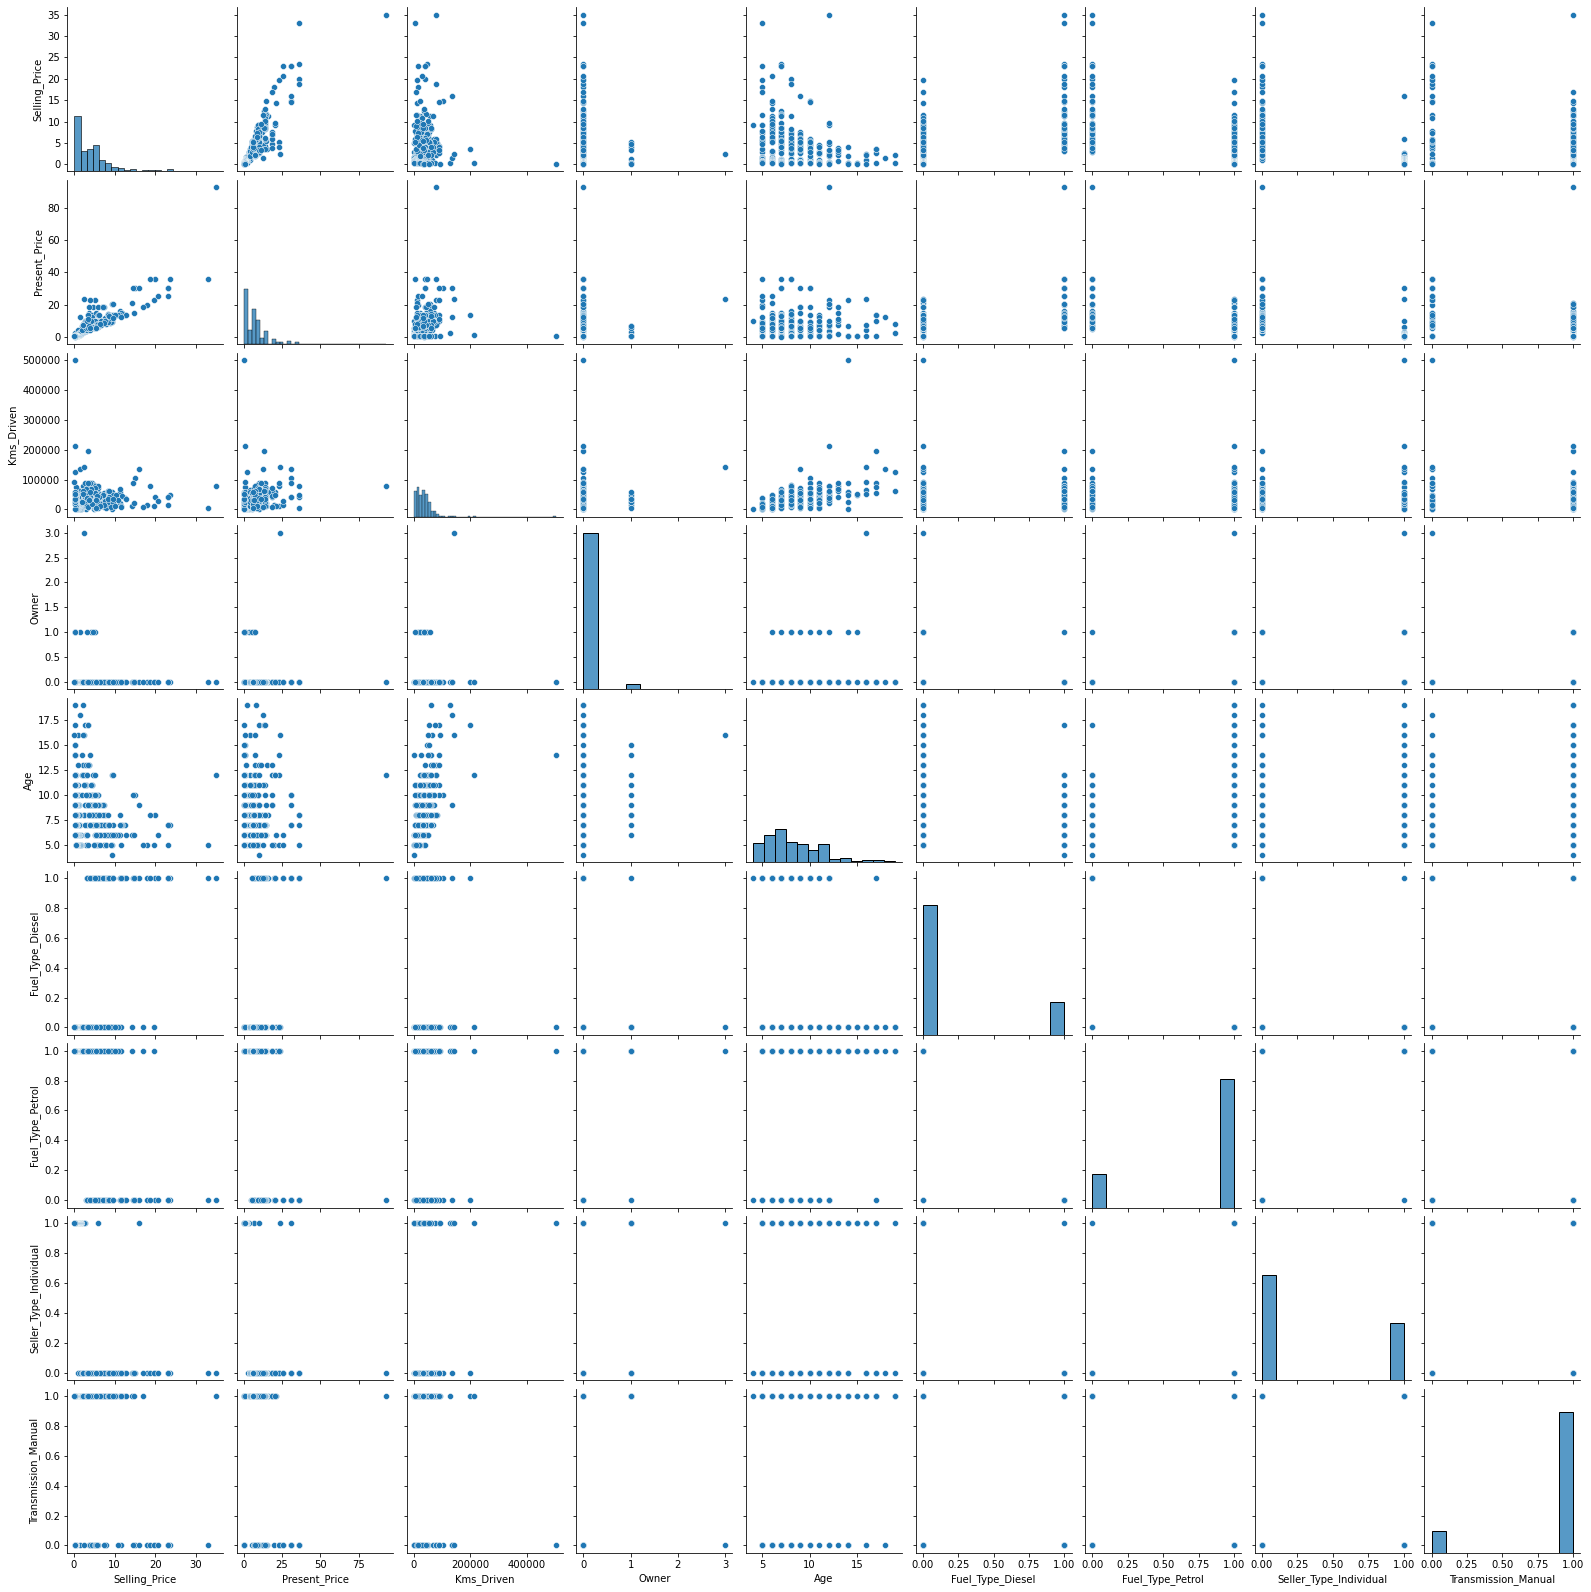

In [21]:
sns.pairplot(df);

In [22]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


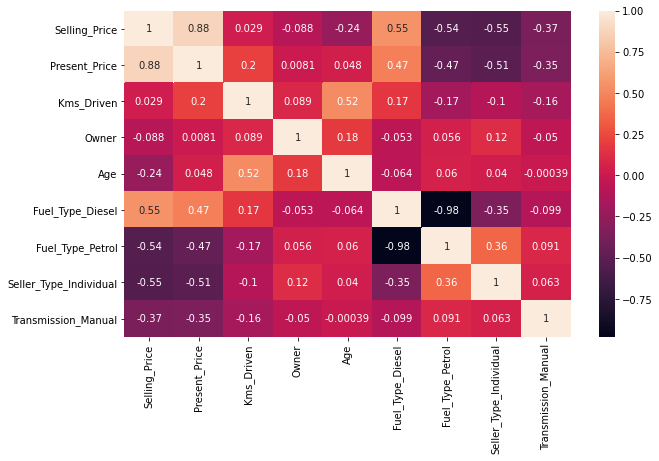

In [23]:
sns.heatmap(df.corr(), annot = True);

In [24]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [25]:
df = df.iloc[:,[1,2,3,4,5,6,7,8,0]]

In [26]:
df.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Selling_Price
0,5.59,27000,0,8,0,1,0,1,3.35
1,9.54,43000,0,9,1,0,0,1,4.75
2,9.85,6900,0,5,0,1,0,1,7.25
3,4.15,5200,0,11,0,1,0,1,2.85
4,6.87,42450,0,8,1,0,0,1,4.60


### Splitting data into training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (210, 8)
Train target shape   :  (210,)
Test features shape  :  (91, 8)
Test target shape    :  (91,)


In [30]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
185,0.58,1900,0,14,0,1,1,0
72,18.61,56001,0,9,0,1,0,1
15,10.79,43000,0,6,1,0,0,1
10,3.60,2135,0,5,0,1,0,1
196,0.52,500000,0,14,0,1,1,0


In [31]:
X_test.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.57,24000,0,6,0,1,1,0
289,13.60,10980,0,6,0,1,0,1
228,9.40,60000,0,10,1,0,0,1
198,0.57,35000,1,11,0,1,1,1
60,18.61,40001,0,9,0,1,0,1


In [32]:
y_train.head()

185    0.25
72     7.45
15     7.75
10     2.85
196    0.17
Name: Selling_Price, dtype: float64

In [33]:
y_test.head()

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
Name: Selling_Price, dtype: float64

# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.00119397, 0.0028028 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.19689569, 0.11111311, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.11201563, 0.08508509, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.0323456 , 0.03203203, 0.33333333, ..., 1.        , 1.        ,
        1.        ],
       [0.10344079, 0.13781982, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.01421904, 0.00700701, 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [38]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.08542277e-03,  4.70470470e-02,  0.00000000e+00,
         7.14285714e-02,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 1.42516010e-01,  2.09809810e-02,  0.00000000e+00,
         7.14285714e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 9.69282536e-02,  1.19119119e-01,  0.00000000e+00,
         3.57142857e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.08542277e-03,  6.90690691e-02,  3.33333333e-01,
         4.28571429e-01,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.96895691e-01,  7.90810811e-02,  0.00000000e+00,
         2.85714286e-01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 9.17182242e-02,  8.38178178e-02,  0.00000000e+00,
         1.42857143e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.08542277e-02,  5.105105

##  Model Building (Linear Regression)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [42]:
y_pred = lm.predict(X_test_scaled)

In [43]:
y_train_pred = lm.predict(X_train_scaled)

In [44]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [45]:
y_train_pred

array([ 0.07248904,  8.84387538,  8.70260141,  4.2470474 , -2.16264198,
        4.10546804,  5.95942852,  4.31105187, -2.99122714,  8.35263141,
       -0.69119629,  6.41427867,  3.76998551, 10.52481904,  2.43859642,
       11.06572035,  2.4189465 , -0.22705423,  0.17919197,  5.53938505,
        1.48674019,  3.29131026,  0.28269082, 16.29128853,  4.19422026,
       -0.69531637, 40.52710867,  9.90572556,  0.98448063,  4.22416449,
        7.85078017,  1.99360495,  1.21404593,  6.11778195,  7.30808417,
        0.79733833,  0.6699553 ,  5.49325678,  3.92268348, -0.82138164,
        5.46818998,  6.32129366,  1.50545699,  0.14574999,  1.62173293,
        5.88453935,  6.09118935,  1.13977853,  2.10660985, -0.22951122,
        6.83215853,  1.42689287,  5.80371748, -1.39487623,  1.74751615,
        6.60856344,  4.86412853,  1.54992766,  7.0378253 ,  8.16692117,
        9.48234264,  6.57538893,  0.73882394,  3.23517245,  7.28011165,
        5.21960487, -2.89007823,  5.40760182,  6.38077324, -2.40

In [46]:
y_pred

array([ 2.81694613,  8.0219717 ,  6.62419684, -1.47967587,  8.9148687 ,
        7.56978311,  1.38917767,  0.86717897,  1.41044792,  7.63177508,
        9.19555785,  0.64644643,  8.08030103,  3.2484837 ,  7.04658891,
        3.08477422,  0.50276806, 10.48960716,  1.790244  ,  2.35595178,
        0.43104472,  8.22753486,  6.74700642,  2.6123948 ,  0.83761863,
        3.65227549,  5.20869408,  2.81058233,  2.16740557,  1.79302018,
        0.43706542,  9.24076007, -0.61127887,  2.27699949,  8.70260141,
        4.45151727,  7.13407408,  7.39391401,  2.91857092,  7.77380479,
        3.86541561,  4.11807969,  4.27231023,  0.68712811,  7.48017157,
        0.53829335,  7.18097683, 10.86798394,  3.11706539,  5.57073621,
        6.5295263 ,  2.19802144, 20.26328169, 16.70924352,  7.68557671,
        9.37259627,  4.40061883,  9.0803589 ,  1.78645146,  7.31552873,
        0.28862714, -2.43218949,  1.98384337, -1.49297453,  4.71951589,
        1.83428505, 19.93406836, 18.06338799,  5.34629227, -0.53

In [47]:
lm.coef_

array([38.41826644, -2.2163229 , -3.09082778, -4.98170158,  2.71182996,
        0.71735313, -1.15209579, -1.43835902])

In [48]:
lm.intercept_

3.670095998372987

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [50]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

,linear_train,linear_test
R2,0.882803,0.875616
mae,1.146981,1.269836
mse,2.876321,3.541749
rmse,1.695972,1.881953


# Cross Validate

In [51]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [52]:
from sklearn.model_selection import cross_validate, cross_val_score

In [53]:
model = LinearRegression()

In [54]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv = 5)

In [55]:
scores

{'fit_time': array([0.00448585, 0.00400996, 0.0023272 , 0.0011611 , 0.00087309]),
 'score_time': array([0.00282812, 0.00170183, 0.00172687, 0.00072074, 0.00068879]),
 'test_r2': array([0.68523272, 0.82425761, 0.9139361 , 0.80075633, 0.89312897]),
 'test_neg_mean_absolute_error': array([-1.83347164, -1.29778473, -0.83904845, -1.38292588, -1.13058735]),
 'test_neg_mean_squared_error': array([-12.9080634 ,  -3.30930373,  -1.0344466 ,  -6.48111898,
         -1.89694453]),
 'test_neg_root_mean_squared_error': array([-3.59277934, -1.81914918, -1.01707748, -2.54580419, -1.37729609])}

In [56]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004486,0.002828,0.685233,-1.833472,-12.908063,-3.592779
2,0.004010,0.001702,0.824258,-1.297785,-3.309304,-1.819149
3,0.002327,0.001727,0.913936,-0.839048,-1.034447,-1.017077
4,0.001161,0.000721,0.800756,-1.382926,-6.481119,-2.545804
5,0.000873,0.000689,0.893129,-1.130587,-1.896945,-1.377296


In [57]:
scores =  pd.DataFrame(scores, index = range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.823462
test_neg_mean_absolute_error       -1.296764
test_neg_mean_squared_error        -5.125975
test_neg_root_mean_squared_error   -2.070421
dtype: float64

In [58]:
train_val(y_train, y_train_pred, y_test, y_pred, 'linear')

,linear_train,linear_test
R2,0.882803,0.875616
mae,1.146981,1.269836
mse,2.876321,3.541749
rmse,1.695972,1.881953


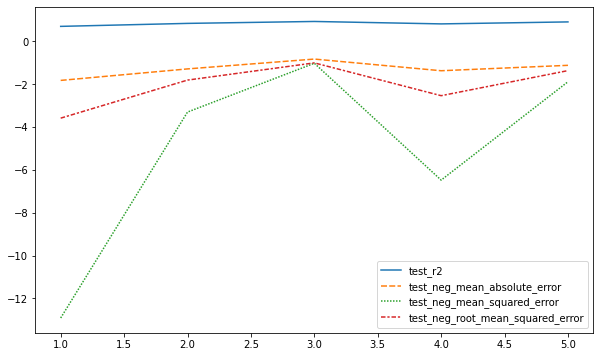

In [59]:
sns.lineplot(data = scores.iloc[:, 2:]);

In [60]:
lm.coef_

array([38.41826644, -2.2163229 , -3.09082778, -4.98170158,  2.71182996,
        0.71735313, -1.15209579, -1.43835902])

In [61]:
lm_df = pd.DataFrame(lm.coef_, columns = ['lm_coef'])
lm_df

,lm_coef
0,38.418266
1,-2.216323
2,-3.090828
3,-4.981702
4,2.711830
5,0.717353
6,-1.152096
7,-1.438359


# Interpret the model

In [62]:
!pip install yellowbrick

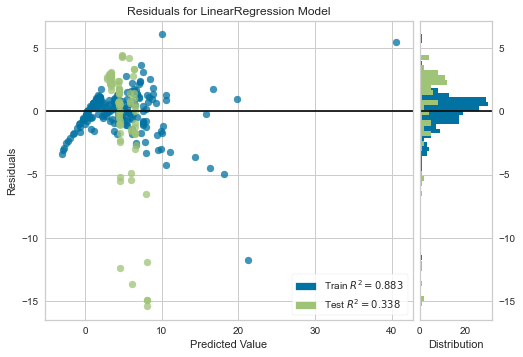

In [63]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

# Model Evaluation

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [66]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8756155246204997
MAE 		: 1.2698356709065521
MSE 		: 3.541748500949201
RMSE 		: 1.8819533737447378


In [67]:
my_dict = {'Actual' : y_test, 'Pred' : y_pred, 'Residual' : y_test - y_pred}

In [68]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.35,2.816946,-2.466946
289,10.11,8.021972,2.088028
228,4.95,6.624197,-1.674197
198,0.15,-1.479676,1.629676
60,6.95,8.914869,-1.964869
...,...,...,...
119,1.05,0.948220,0.101780
19,2.65,3.408251,-0.758251
181,0.30,1.225693,-0.925693
79,14.50,16.778463,-2.278463


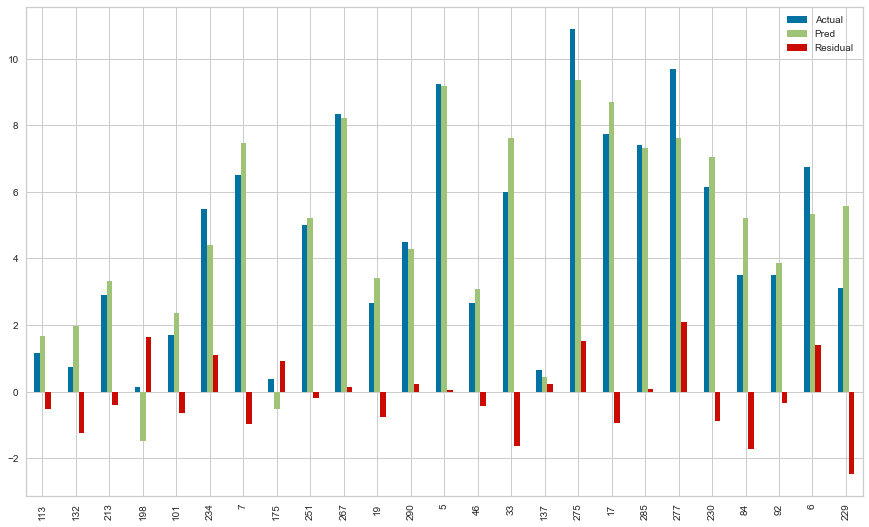

In [69]:
comparing.sample(25).plot(kind = 'bar', figsize = (15,9));

# Regularization

# Ridge

In [70]:
from sklearn.linear_model import Ridge

In [71]:
ridge_model = Ridge(random_state = 42)

In [72]:
ridge_model

Ridge(random_state=42)

In [73]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [74]:
y_pred = ridge_model.predict(X_test_scaled)

In [75]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8016315981221224
MAE 		: 1.5038857360583024
MSE 		: 5.648381663733351
RMSE 		: 2.376632420828545


# Choosing best alpha value with Cross-Validation

In [76]:
from sklearn.linear_model import RidgeCV

In [77]:
ridge_model.alpha

1.0

In [78]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [79]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 5, scoring = 'neg_root_mean_squared_error')

In [80]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [81]:
ridge_cv_model.alpha_

0.17

In [82]:
ridge_cv_model.best_score_

-1.7816099216236552

In [83]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_pred

array([ 3.08341596,  7.65159691,  6.95353736, -1.25650029,  8.34799068,
        7.86519183,  1.3256785 ,  0.83948368,  1.37220693,  7.89086528,
        9.37008239,  0.61939275,  8.12638492,  3.48795248,  7.35056464,
        3.25246954,  0.46373056,  9.83752053,  1.73260028,  2.22672623,
        0.42974719,  8.46748566,  7.05915759,  2.77928881,  0.81471385,
        3.71806228,  5.10885211,  2.95401089,  2.06249254,  1.70693066,
        0.43526357,  9.29868795, -0.56664805,  2.40239191,  8.88431023,
        4.47419563,  6.79311851,  6.9048947 ,  3.10667973,  7.26495393,
        3.70609711,  4.38302237,  4.31650978,  0.68421852,  7.78628264,
        0.5247747 ,  6.86080123, 10.45291341,  3.27851939,  6.03203241,
        6.7432392 ,  2.08882319, 19.44393604, 16.39211042,  7.96762766,
        9.31457469,  4.45646009,  9.21400261,  1.9156634 ,  7.515153  ,
        0.30637294, -2.17589349,  1.90153605, -1.39341539,  4.73725221,
        1.74241979, 19.1270455 , 17.52019506,  5.2841366 , -0.46

In [84]:
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [85]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge_cv')
rcs

,ridge_cv_train,ridge_cv_test
R2,0.877401,0.862276
mae,1.174455,1.319020
mse,3.008901,3.921594
rmse,1.734618,1.980301


In [86]:
pd.concat([ls, rcs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test
R2,0.882803,0.875616,0.877401,0.862276
mae,1.146981,1.269836,1.174455,1.319020
mse,2.876321,3.541749,3.008901,3.921594
rmse,1.695972,1.881953,1.734618,1.980301


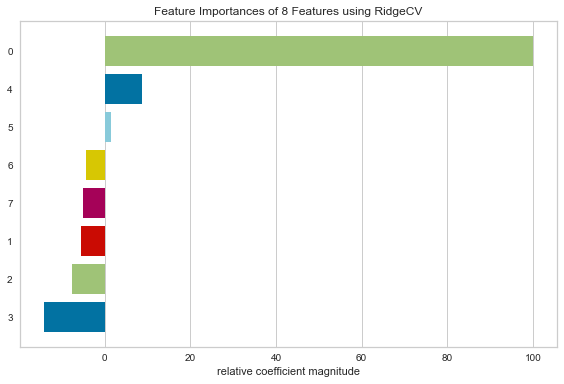

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [87]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
viz.fit(X_train_scaled, y_train)
viz.show()

# Lasso

In [88]:
from sklearn.linear_model import Lasso, LassoCV

In [89]:
lasso_model = Lasso(alpha = 1, random_state = 42)

In [90]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [91]:
y_pred = lasso_model.predict(X_test_scaled)
y_pred

array([3.78292859, 4.93758754, 5.16087201, 3.78292859, 4.93758754,
       5.16087201, 3.78292859, 3.78292859, 3.78292859, 5.16087201,
       5.16087201, 3.78292859, 4.93758754, 3.78292859, 5.16087201,
       4.93758754, 3.78292859, 4.93758754, 3.78292859, 3.78292859,
       3.78292859, 5.16087201, 5.16087201, 4.93758754, 3.78292859,
       4.93758754, 4.93758754, 4.93758754, 3.78292859, 3.78292859,
       3.78292859, 5.16087201, 3.78292859, 4.93758754, 5.16087201,
       4.93758754, 4.93758754, 4.93758754, 4.93758754, 4.93758754,
       4.93758754, 4.93758754, 4.93758754, 3.78292859, 5.16087201,
       3.78292859, 4.93758754, 4.93758754, 4.93758754, 5.16087201,
       4.93758754, 3.78292859, 5.16087201, 5.16087201, 5.16087201,
       4.93758754, 4.93758754, 5.16087201, 4.93758754, 4.93758754,
       3.78292859, 3.78292859, 3.78292859, 3.78292859, 4.93758754,
       3.78292859, 5.16087201, 5.16087201, 4.93758754, 3.78292859,
       5.16087201, 4.93758754, 4.93758754, 4.93758754, 4.93758

In [92]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.12172591880560912
MAE 		: 3.3723737721640132
MSE 		: 25.008152351828233
RMSE 		: 5.000815168732817


# Choosing best alpha value with Cross-Validation

In [93]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter = 10000, random_state = 42)

In [94]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=42)

In [95]:
y_pred = lasso_cv_model.predict(X_test_scaled)

In [96]:
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [97]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8562464663534303
MAE 		: 1.311421311358289
MSE 		: 4.093266951084475
RMSE 		: 2.023182382061606


In [98]:
lasso_cv_model.alpha_

0.03

In [99]:
lasso_cv_model.mse_path_[-1].mean()

4.05753202384816

In [100]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, 'lasso_cv')
lcs

,lasso_cv_train,lasso_cv_test
R2,0.872536,0.856246
mae,1.149070,1.311421
mse,3.128300,4.093267
rmse,1.768700,2.023182


In [101]:
pd.concat([ls, rcs, lcs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.882803,0.875616,0.877401,0.862276,0.872536,0.856246
mae,1.146981,1.269836,1.174455,1.319020,1.149070,1.311421
mse,2.876321,3.541749,3.008901,3.921594,3.128300,4.093267
rmse,1.695972,1.881953,1.734618,1.980301,1.768700,2.023182


# Elastic-Net

In [102]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [103]:
elastic_model = ElasticNet(random_state = 42)

In [104]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [105]:
y_pred = elastic_model.predict(X_test_scaled)

In [106]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.17782724763828117
MAE 		: 3.241096714433818
MSE 		: 23.41071186186238
RMSE 		: 4.838461724749136


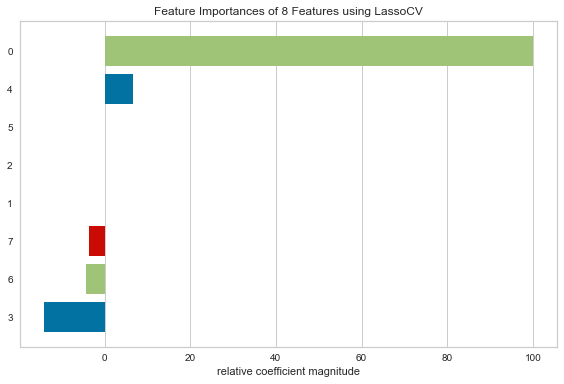

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [107]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
viz.fit(X_train_scaled, y_train)
viz.show()

In [108]:
y_train_pred = elastic_model.predict(X_train_scaled)

In [109]:
es = train_val(y_train, y_train_pred, y_test, y_pred, 'elastic')
es

,elastic_train,elastic_test
R2,0.192051,0.177827
mae,2.882930,3.241097
mse,19.829190,23.410712
rmse,4.452998,4.838462


In [110]:
pd.concat([ls, rcs, lcs, es], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.882803,0.875616,0.877401,0.862276,0.872536,0.856246,0.192051,0.177827
mae,1.146981,1.269836,1.174455,1.319020,1.149070,1.311421,2.882930,3.241097
mse,2.876321,3.541749,3.008901,3.921594,3.128300,4.093267,19.829190,23.410712
rmse,1.695972,1.881953,1.734618,1.980301,1.768700,2.023182,4.452998,4.838462


### Choosing best alpha and l1_ratio values with Cross-Validation

In [111]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 5, max_iter = 10000, random_state = 42)

In [112]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=10000,
             random_state=42)

In [113]:
elastic_cv_model.alpha_


0.01

In [114]:
elastic_cv_model.l1_ratio_

0.95

In [115]:
y_pred = elastic_cv_model.predict(X_test_scaled)

In [116]:
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [117]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, 'elastic_cv')
ecs

,elastic_cv_train,elastic_cv_test
R2,0.876700,0.860899
mae,1.162137,1.316500
mse,3.026118,3.960790
rmse,1.739574,1.990173


In [118]:
pd.concat([ls, rcs, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.882803,0.875616,0.877401,0.862276,0.872536,0.856246,0.192051,0.177827,0.876700,0.860899
mae,1.146981,1.269836,1.174455,1.319020,1.149070,1.311421,2.882930,3.241097,1.162137,1.316500
mse,2.876321,3.541749,3.008901,3.921594,3.128300,4.093267,19.829190,23.410712,3.026118,3.960790
rmse,1.695972,1.881953,1.734618,1.980301,1.768700,2.023182,4.452998,4.838462,1.739574,1.990173


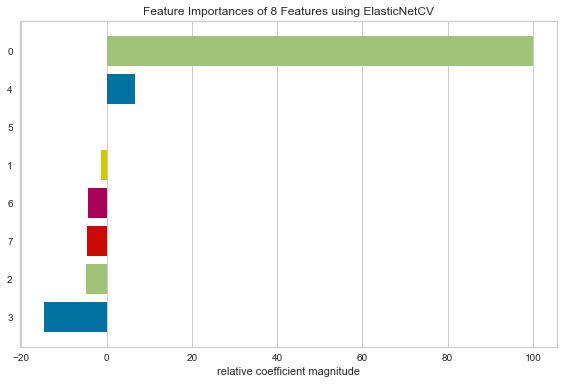

<AxesSubplot:title={'center':'Feature Importances of 8 Features using ElasticNetCV'}, xlabel='relative coefficient magnitude'>

In [119]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(elastic_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
viz.fit(X_train_scaled, y_train)
viz.show()

# Grid Search

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [122]:
param_grid = {'alpha' : [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             'l1_ratio' : [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [123]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 2)

In [124]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [125]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.95}

In [126]:
grid_model.best_score_

-1.7606604530159626

In [127]:
y_pred = grid_model.predict(X_test_scaled)

In [128]:
y_train_pred = grid_model.predict(X_train_scaled)

In [134]:
gs = train_val(y_train, y_train_pred, y_test, y_pred, 'GridSearch')

In [136]:
pd.concat([ls, rcs, lcs, es, ecs, gs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.882803,0.875616,0.877401,0.862276,0.872536,0.856246,0.192051,0.177827,0.876700,0.860899,0.874372,0.857523
mae,1.146981,1.269836,1.174455,1.319020,1.149070,1.311421,2.882930,3.241097,1.162137,1.316500,1.163817,1.325875
mse,2.876321,3.541749,3.008901,3.921594,3.128300,4.093267,19.829190,23.410712,3.026118,3.960790,3.083245,4.056920
rmse,1.695972,1.881953,1.734618,1.980301,1.768700,2.023182,4.452998,4.838462,1.739574,1.990173,1.755917,2.014180


# Final Model

In [137]:
final_scaler = MinMaxScaler()

In [138]:
X_scaled = final_scaler.fit_transform(X)

In [139]:
final_model = LinearRegression()

In [140]:
final_model.fit(X_scaled, y)

LinearRegression()